# Importing necessary Libraries

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Display two decimal points after float
pd.options.display.float_format = '{:.2f}'.format 

# Learning about data

In [3]:
#loan_data = pd.read_csv('loan.csv')
loan_data = pd.read_csv('Data/loan.csv',dtype='object')
print(loan_data.shape)
print(loan_data.dtypes)

(39717, 111)
id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object


In [4]:
print('******info*******')
print(loan_data.info)

******info*******
<bound method DataFrame.info of             id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0      1077501   1296599      5000        5000            4975   36 months   
1      1077430   1314167      2500        2500            2500   60 months   
2      1077175   1313524      2400        2400            2400   36 months   
3      1076863   1277178     10000       10000           10000   36 months   
4      1075358   1311748      3000        3000            3000   60 months   
...        ...       ...       ...         ...             ...         ...   
39712    92187     92174      2500        2500            1075   36 months   
39713    90665     90607      8500        8500             875   36 months   
39714    90395     90390      5000        5000            1325   36 months   
39715    90376     89243      5000        5000             650   36 months   
39716    87023     86999      7500        7500             800   36 months   

      int_rat

In [5]:
pd.set_option('display.max_columns', None)
loan_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [6]:
print(loan_data.isnull().sum())
'''consective columns all have null values'''
print('Number of empty Rows:')
print(loan_data.isnull().all(axis=1).sum())
print('Number of empty Columns')
print(loan_data.isnull().all(axis=0).sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64
Number of empty Rows:
0
Number of empty Columns
54


# Cleaning data

##  Removing null values

In [7]:
print('New shape ',loan_data.shape)
#remove empty columns
print('Number of empty Columns',loan_data.isnull().all(axis=0).sum())
loan_data = loan_data.loc[:, loan_data.notnull().any()]
print('New shape ',loan_data.shape)

New shape  (39717, 111)
Number of empty Columns 54
New shape  (39717, 57)


In [8]:
#no duplicate rows based on ID
loan_data.duplicated(['id']).sum()

0

In [9]:
# Total percentage of null values in the data
(loan_data.isnull().sum()/loan_data.shape[0])*100
#Based on the data dictionar columns which have more null havve no significance

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.59
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

## Dropping Unnessary columns

In [10]:
# After observing the above output, we are dropping columns which are not important and which doesn't add value to our use case.
loan_data.drop(['emp_title','title','desc','mths_since_last_delinq','url','mths_since_last_record', 'next_pymnt_d'],axis=1,inplace=True)
loan_data.drop(['pymnt_plan','zip_code','tax_liens'],axis=1,inplace=True)
loan_data.drop(['acc_now_delinq','collections_12_mths_ex_med','policy_code','delinq_amnt'],axis=1,inplace=True)
loan_data.shape

(39717, 43)

In [11]:
print((loan_data.isnull().sum()/loan_data.shape[0])*100)
loan_data.head(3)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
initial_list_status        0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_py

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,INDIVIDUAL,0,0


## Covert object type to numeric/ float

In [12]:
#convert columns to numeric for analysis
loan_data['emp_length'].fillna('0',inplace=True)
loan_data['emp_length']=loan_data.emp_length.str.extract('(\d+)').astype(int)
loan_data.rename(columns={'emp_length':'Experiance'},inplace=True)

loan_data.loc[:,'int_rate'] = loan_data.loc[:,'int_rate'].str[:-1].astype(float)

loan_data['term']=loan_data['term'].str.extract('(\d)').astype(int)


In [13]:
loan_data.loc[:,['dti','annual_inc']] = loan_data[['dti','annual_inc']].astype(float)
loan_data[['total_pymnt_inv']] = loan_data[['total_pymnt_inv']].astype(float)
loan_data.delinq_2yrs = loan_data.delinq_2yrs.astype(int)
loan_data.inq_last_6mths = loan_data.inq_last_6mths.astype(int)
loan_data[['total_acc','revol_bal','open_acc']] = loan_data[['total_acc','revol_bal','open_acc']].apply(pd.to_numeric)

In [14]:
columns_to_convert = ['out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
loan_data[columns_to_convert] = loan_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')
columns_to_convert = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','total_pymnt']
loan_data[columns_to_convert] = loan_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [15]:
loan_data.revol_util = loan_data.revol_util.str[:-1].astype(float)

In [16]:
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  object 
 1   member_id                 39717 non-null  object 
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  int32  
 6   int_rate                  39717 non-null  float64
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  Experiance                39717 non-null  int32  
 11  home_ownership            39717 non-null  object 
 12  annual_inc                39717 non-null  float64
 13  verification_status       39717 non-null  object 
 14  issue_

In [17]:
loan_data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,Experiance,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,3,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.00,0.00,5863.16,5833.84,5000,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.00,6,15.27,59.83,C,C4,1,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.00,3,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.00,0.00,3005.67,3005.67,2400,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0,0


# Univariate Analysis

## Understanding relation between numeric variables

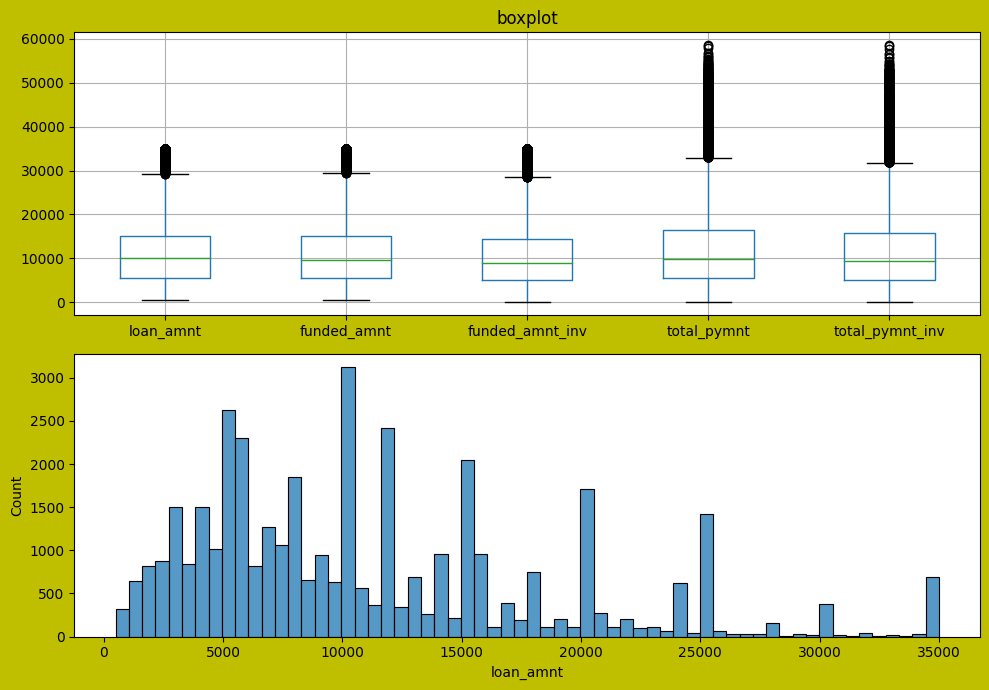

In [18]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,7),facecolor='y')
loan_data[['loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv']].boxplot(ax=ax[0])
ax[0].set_title('boxplot')
#plt.subplot(2,1,2)
sns.histplot(loan_data['loan_amnt'],ax=ax[1])
plt.tight_layout()
plt.show()



**From this boxplot we can see that customers have paid more `total_pymnt` than what they took `funded_amnt`**

# Correlation Matrix

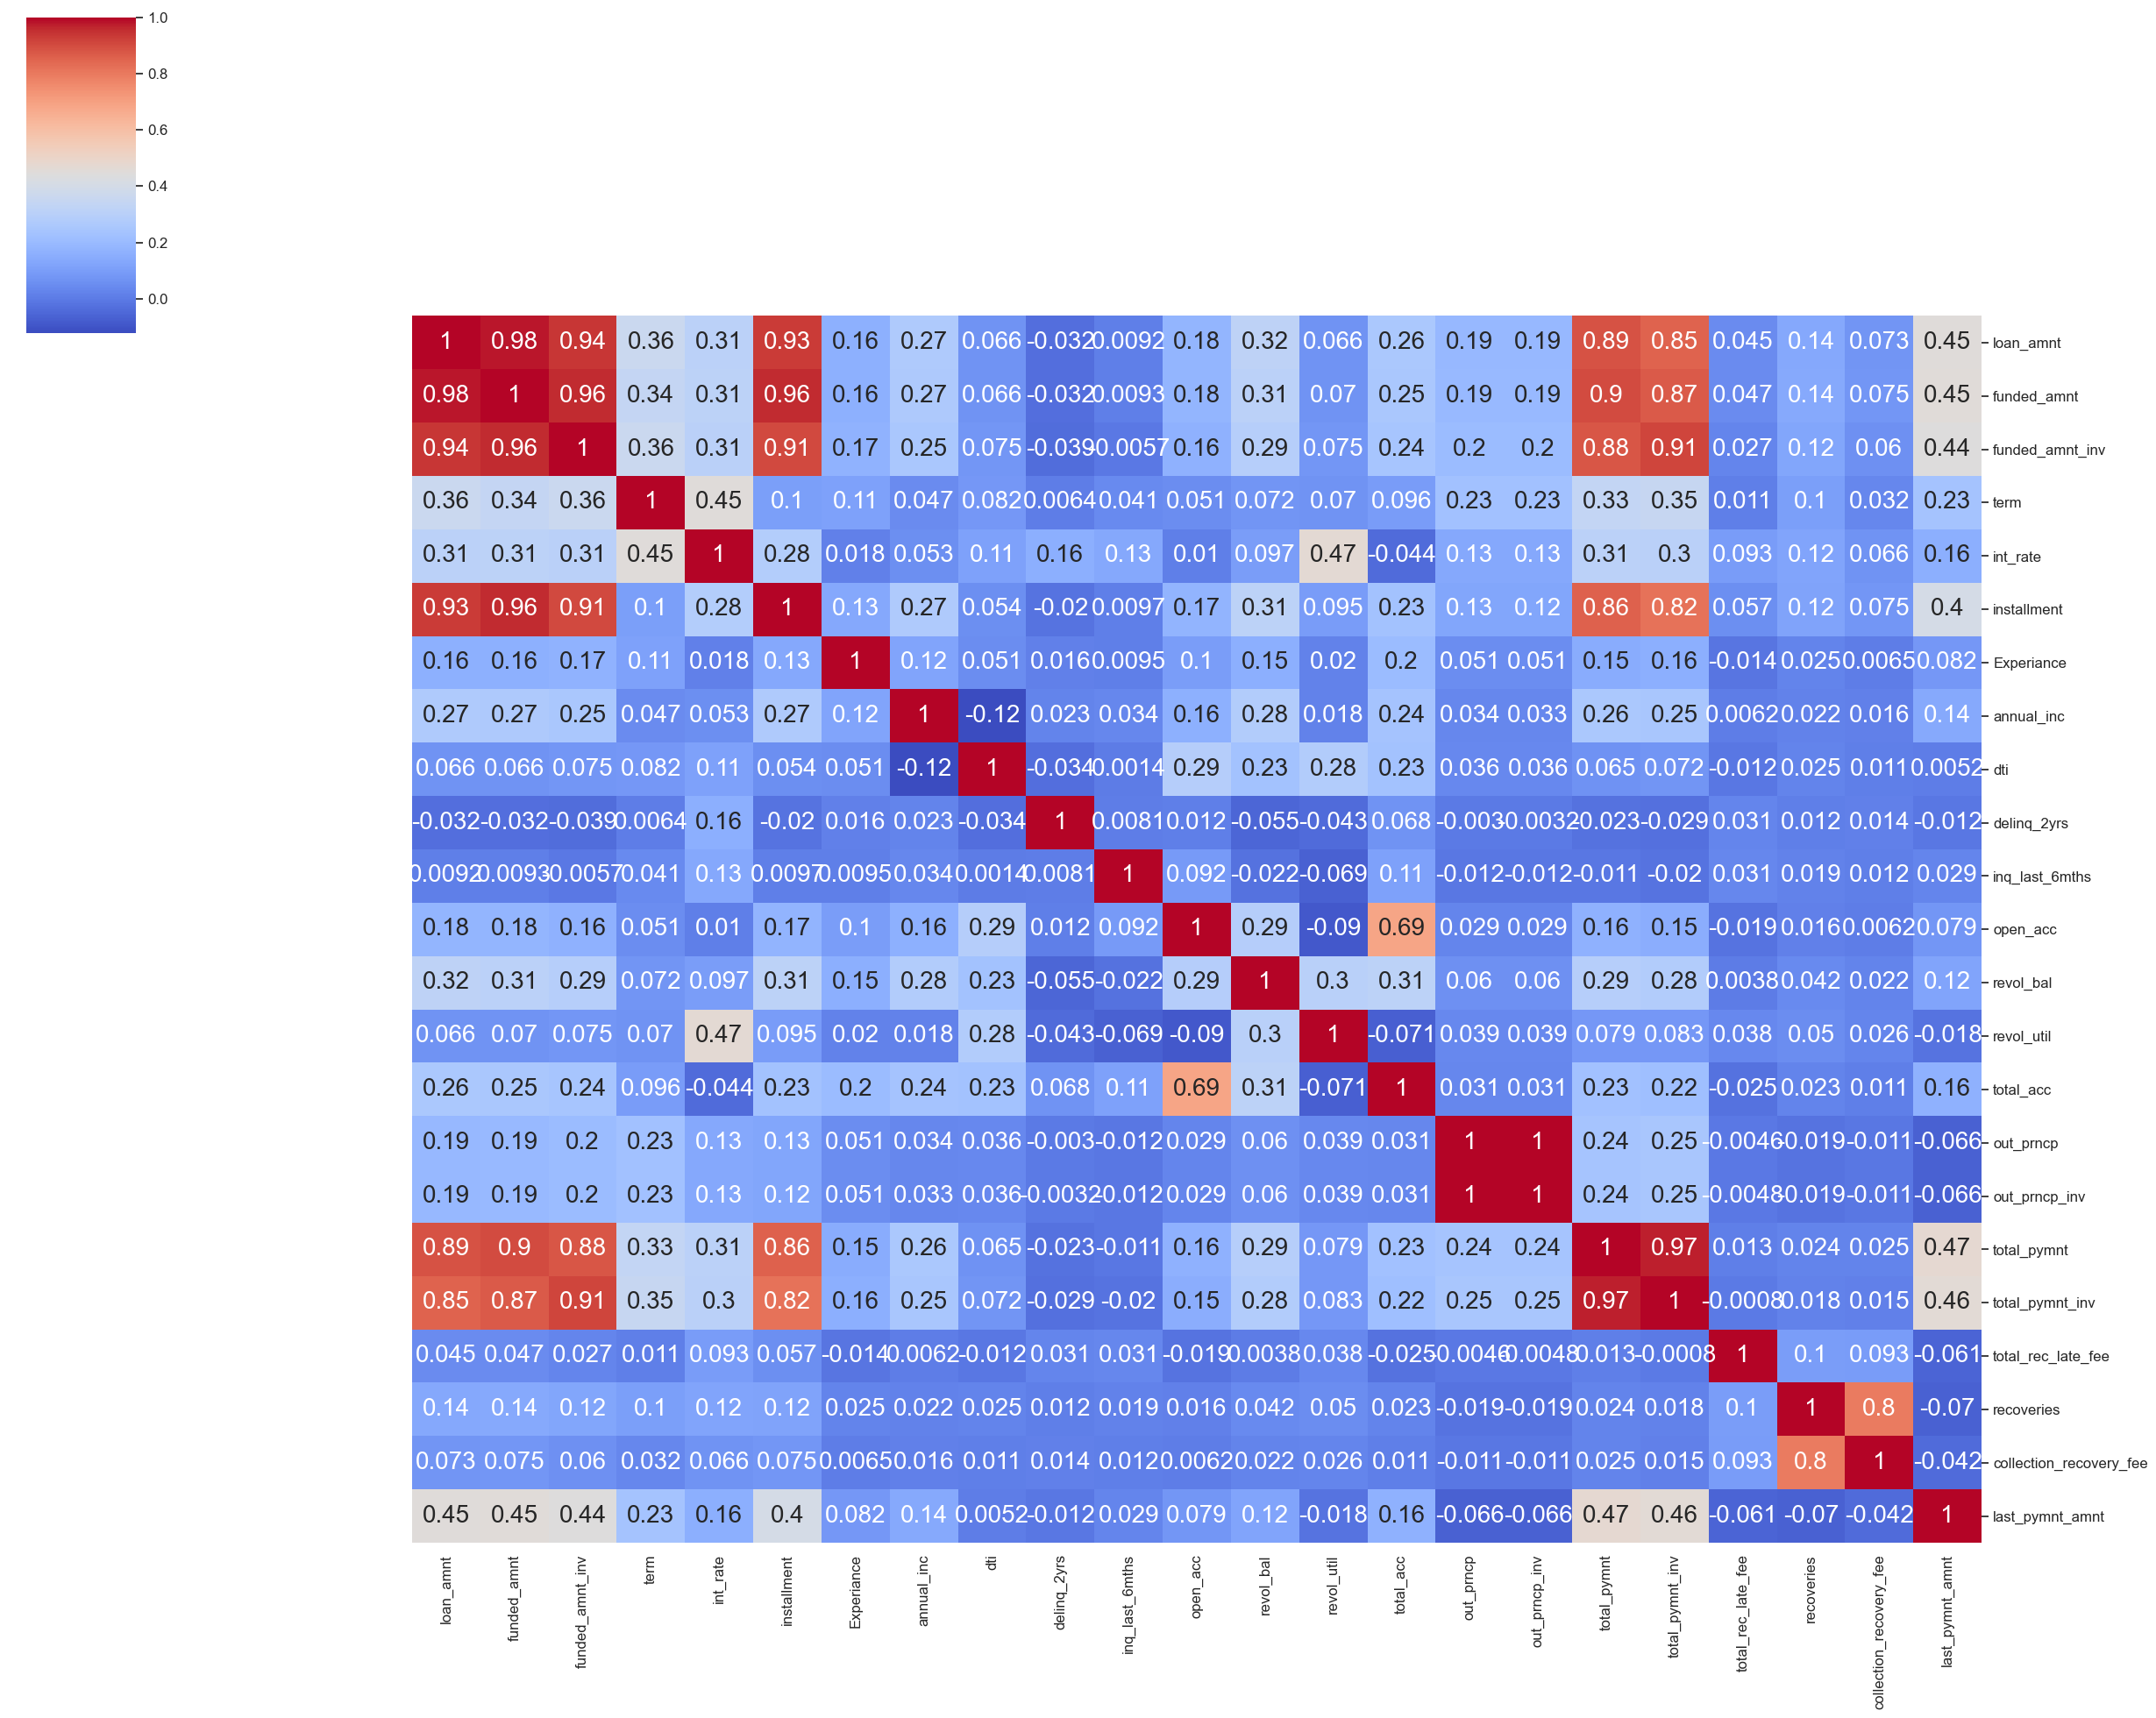

In [19]:
numeric_columns = loan_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.set(font_scale=1.1)
plt.rcParams['font.size'] = 20  # Adjust the font size as needed
plt.rcParams['font.weight'] = 50  # Adjust the font weight as needed
sns.clustermap(correlation_matrix,figsize=(25, 20),annot=True,cmap="coolwarm",row_cluster=False, col_cluster=False)
plt.show()

#### Observations from the matrix
1. Annual income and DTI `debt to income ratio` are negatively correlated
> So if Annual income is less more debt is owed to the bank.
2. If loan amount incrases, number of installments also increases
3. Annual income  positively correlated with ecperience.
4. Outstanding principal `out_prncp` positively correlated with loan_amnt
5. loan_amnt and last_pymnt_amnt negatively correlated

https://seaborn.pydata.org/generated/seaborn.countplot.html
countplot = catagorical as numerical

# Bivariate Analysis
#### Let us compare how loan_status is related to other numerical/catagorical columns

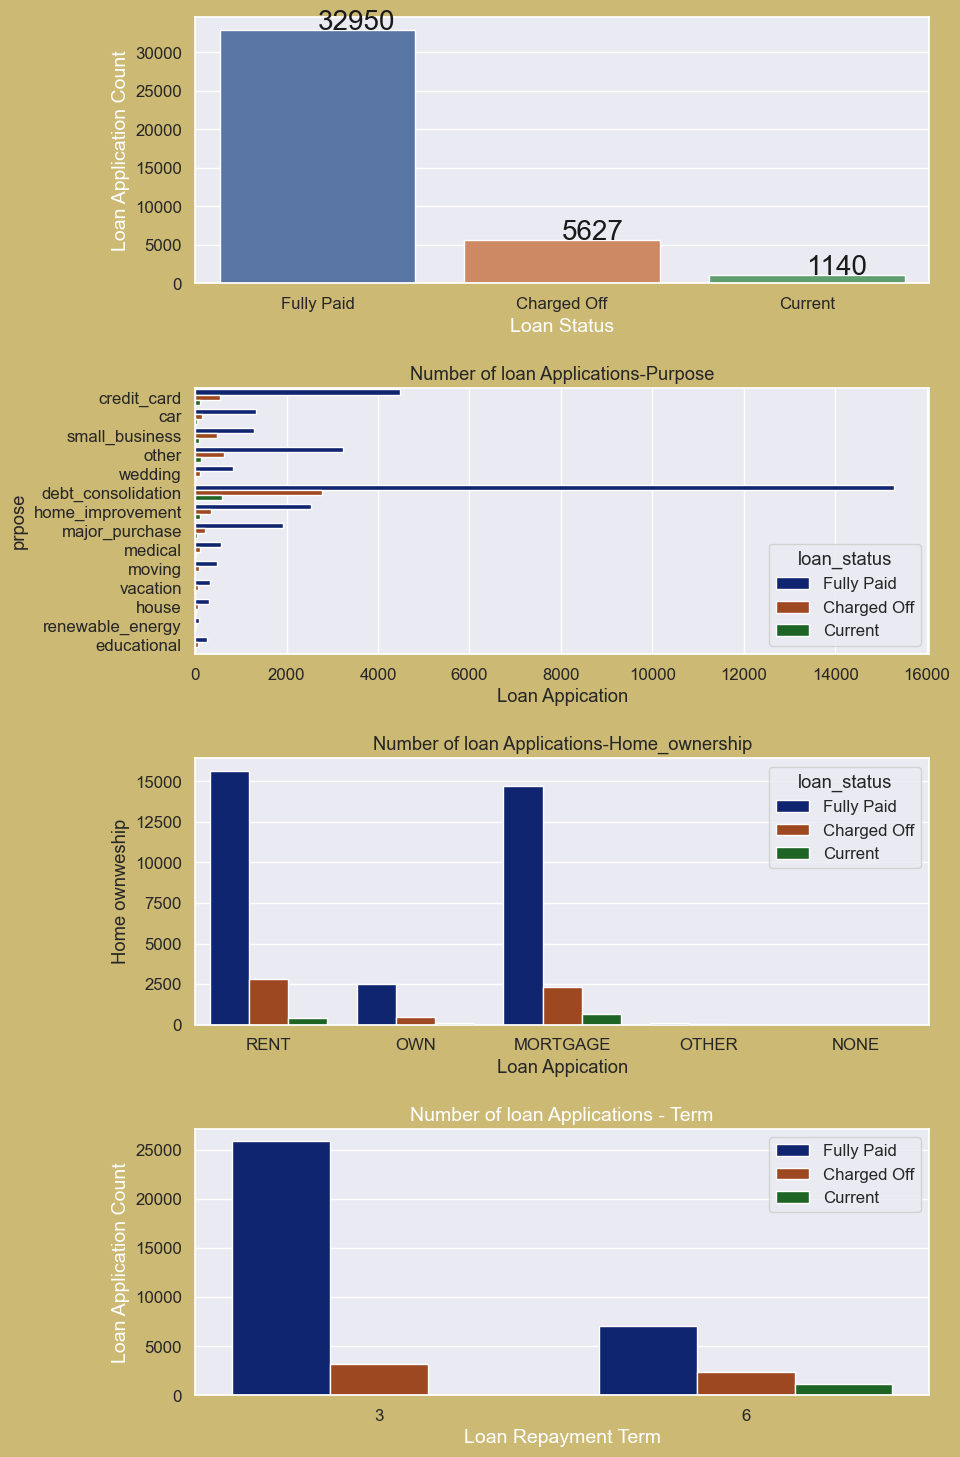

In [20]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(10,15),facecolor='y')
#sns.set_theme(style="whitegrid")
sns.countplot(x=loan_data['loan_status'],ax=ax[0])
ax[0].set_xlabel('Loan Status',fontsize=14,color = 'w')
ax[0].set_ylabel('Loan Application Count',fontsize=14,color = 'w')
s=loan_data['loan_status'].value_counts()
for i,v in s.reset_index().iterrows():
    ax[0].text(i, v[1],v[1],color='k')

sns.countplot(y=loan_data["purpose"],hue=loan_data['loan_status'],palette='dark',ax=ax[1])
ax[1].set_title('Number of loan Applications-Purpose')
ax[1].set_xlabel('Loan Appication')
ax[1].set_ylabel('prpose')


sns.countplot(x="home_ownership",data=loan_data,hue='loan_status',palette='dark',ax=ax[2])
ax[2].set_title('Number of loan Applications-Home_ownership')
ax[2].set_xlabel('Loan Appication')
ax[2].set_ylabel('Home ownweship')


sns.countplot(x="term",data=loan_data,hue='loan_status',palette='dark',ax=ax[3])
ax[3].set_title('Number of loan Applications - Term',fontsize=14,color='w')
ax[3].set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax[3].set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax[3].legend(bbox_to_anchor=(1, 1))

plt.subplots_adjust(hspace=0.5)  # You can adjust the hspace value to control the vertical gap
plt.tight_layout()
plt.show()

#### Observations
> 1. In all the disbersed loans fully paid loans are higher<br>
> 2. Fully paid loans is higher for debt consolidation, charged off loan is high when fully paid is high <br>
> 3. Below plot shows that most of them living in rented home or mortgazed their home have fully paid the loan <br>
> 4. Those who had taken loan to repay in 60 months had less % of number of applicants getting charged off as compared to applicants who had taken loan for 36 months

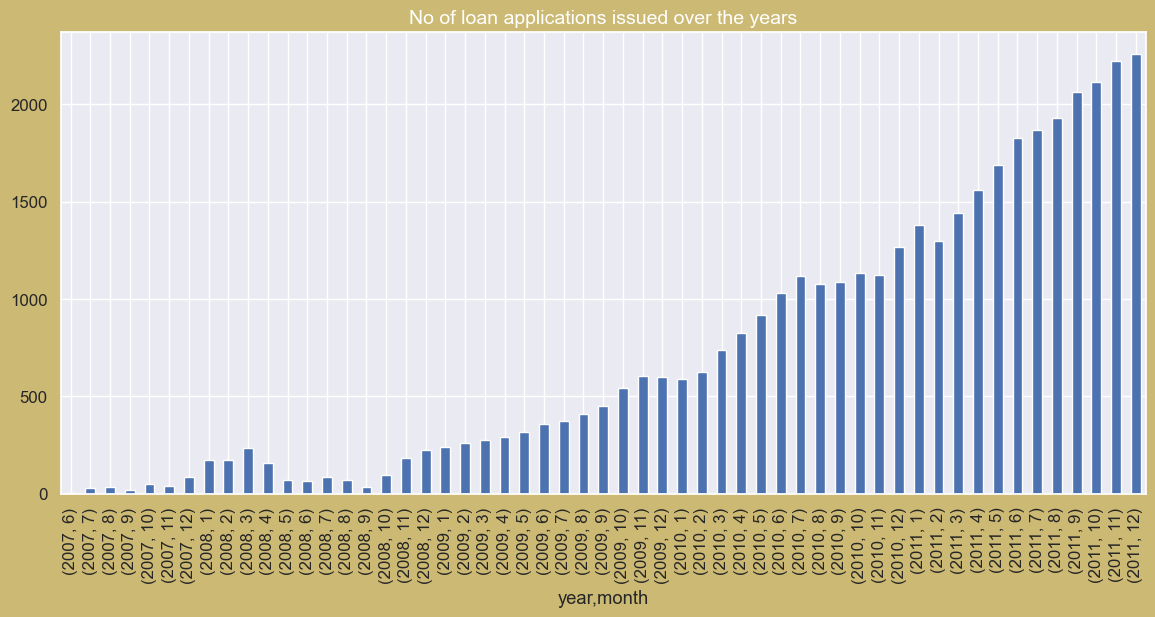

In [21]:
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['year']=loan_data['issue_d'].dt.year
loan_data['month']=loan_data['issue_d'].dt.month
plt.figure(figsize=(14,6),facecolor='y')
loan_data.groupby(['year','month']).id.count().plot(kind='bar')
plt.title("No of loan applications issued over the years",fontsize=14,color='w')
plt.show()

### Observation

By every passing year we can see that loan applications are increased. Number of loans issued in 2008( May-Octor) got dipped, may be due to Recession.

# Bivariate analysis

In [22]:
loan_data['dti'].describe()

count   39717.00
mean       13.32
std         6.68
min         0.00
25%         8.17
50%        13.40
75%        18.60
max        29.99
Name: dti, dtype: float64

In [23]:
loan_data['annual_inc'].value_counts()

annual_inc
60000.00    1505
50000.00    1057
40000.00     876
45000.00     830
30000.00     825
            ... 
56820.00       1
45314.00       1
53913.00       1
62880.00       1
27376.00       1
Name: count, Length: 5318, dtype: int64

#### Observation
People with average DTI have a better grade, so better change of getting a loan

## Let us compare how loan_status is related to other numerical/catagorical columns

In [24]:
addrVsLoanStual = pd.crosstab(index=loan_data['addr_state'],columns=loan_data['loan_status'])
addrVsLoanStual.reset_index()
print('*******************************addrVsLoanStual******************************************************')
print(addrVsLoanStual.head())
ExVsLoanStatus = pd.crosstab(index=loan_data['Experiance'],columns=loan_data['loan_status'])
ExVsLoanStatus.reset_index()
print('******************************ExVsLoanStatus*********************************************************')
print(ExVsLoanStatus.head())
BancVsLoanStatus = pd.crosstab(index=loan_data['pub_rec_bankruptcies'],columns=loan_data['loan_status'])
BancVsLoanStatus.reset_index()
print('****************************BancVsLoanStatus***************************************************')
print(BancVsLoanStatus.head())
VerificationStatusVsLS = pd.crosstab(index=loan_data['verification_status'],columns=loan_data['loan_status'])
VerificationStatusVsLS.reset_index()
print('**********************************VerificxationStatusVsLS*********************************')
print(VerificationStatusVsLS.head())
pub_recVsLS = pd.crosstab(index=loan_data['pub_rec'],columns=loan_data['loan_status'])
pub_recVsLS.reset_index()
print('*(*****************************pub_recVsLS******************************************')
print(pub_recVsLS.head())

*******************************addrVsLoanStual******************************************************
loan_status  Charged Off  Current  Fully Paid
addr_state                                   
AK                    15        2          63
AL                    54       17         381
AR                    27       10         208
AZ                   123       30         726
CA                  1125      150        5824
******************************ExVsLoanStatus*********************************************************
loan_status  Charged Off  Current  Fully Paid
Experiance                                   
0                    228       42         805
1                   1095      146        6582
2                    567       97        3724
3                    555       83        3457
4                    462       94        2880
****************************BancVsLoanStatus***************************************************
loan_status           Charged Off  Current  Fully Paid
pu

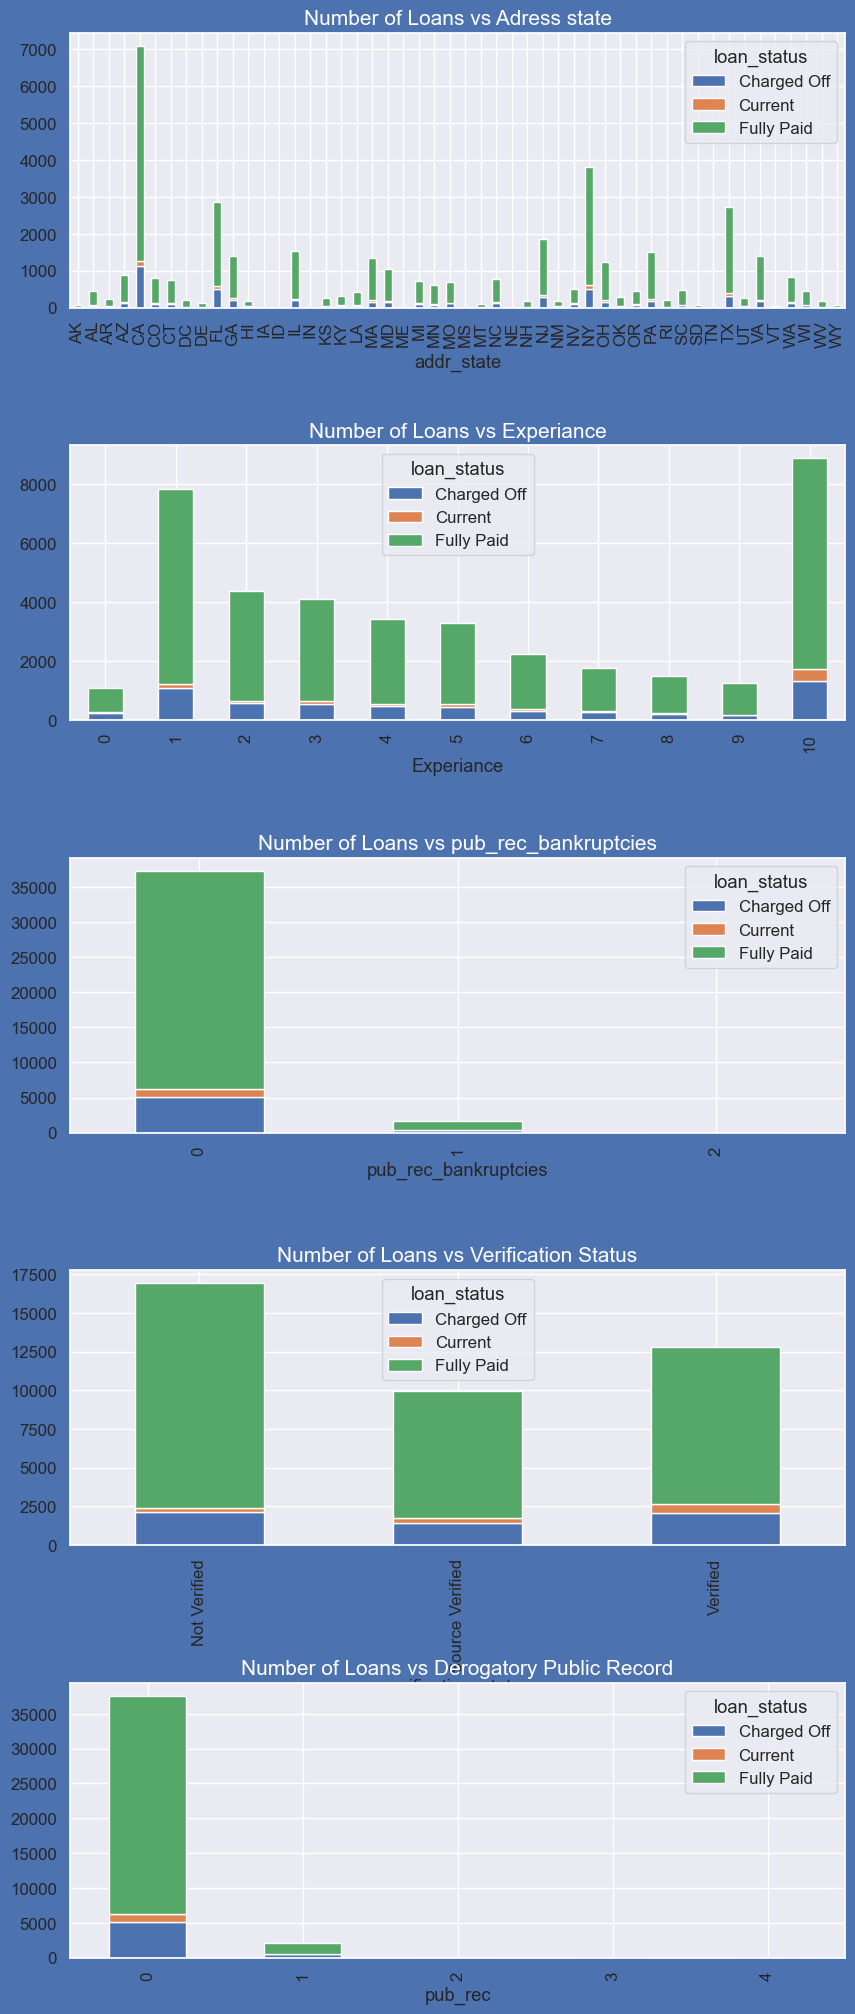

'A derogatory item is an entry that may be considered negative by lenders because \nit indicates risk and hurts your ability to qualify for credit or other services. \nPublic records and collections are derogatory items because they reflect financial\nobligations that were not paid as agreed'

In [25]:
fig, ax = plt.subplots(nrows=5,figsize=(20,20),facecolor='b')
addrVsLoanStual.plot(kind="bar", stacked="True", figsize=[10,25],ax=ax[0])
ax[0].set_title('Number of Loans vs Adress state',fontsize=15,color = 'w')

ExVsLoanStatus.plot(kind="bar", stacked="True", figsize=[10,25],ax=ax[1])
ax[1].set_title('Number of Loans vs Experiance',fontsize=15,color = 'w')

BancVsLoanStatus.plot(kind="bar", stacked="True", figsize=[10,25],ax=ax[2])
ax[2].set_title('Number of Loans vs pub_rec_bankruptcies',fontsize=15,color = 'w')

VerificationStatusVsLS.plot(kind="bar", stacked="True", figsize=[10,25],ax=ax[3])
ax[3].set_title('Number of Loans vs Verification Status',fontsize=15,color = 'w')

pub_recVsLS.plot(kind="bar", stacked="True", figsize=[10,25],ax=ax[4])
ax[4].set_title('Number of Loans vs Derogatory Public Record',fontsize=15,color = 'w')
plt.subplots_adjust(hspace=0.5)
plt.show()
'''A derogatory item is an entry that may be considered negative by lenders because 
it indicates risk and hurts your ability to qualify for credit or other services. 
Public records and collections are derogatory items because they reflect financial
obligations that were not paid as agreed'''

### Observations
> 1. `Number of loans vs adder state` show how loan status is distributed. 'CA' state has more charged of loans.
> 2. People with high income have more fully paid applicants. As because icrease in experiance, also increase annual income.
> 3. People who have 0 public record of bankrupties have fully paid the loan. So these are the people who are more likely to be sanctioned loans in the future.
> 4. People with 0 Derogatory public records have more appicants who have repaid the loans

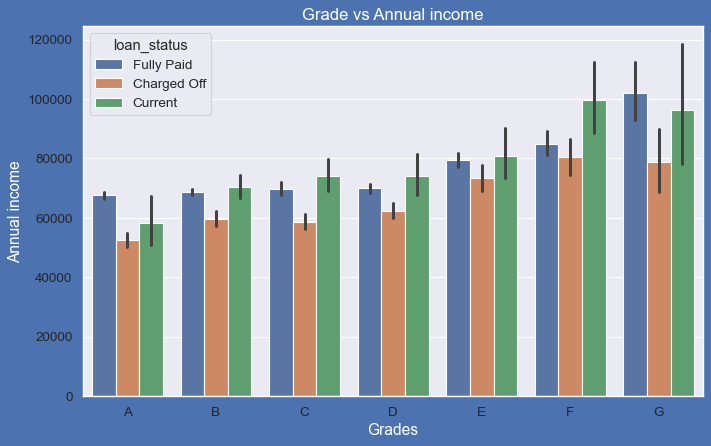

In [26]:
plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan_data, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

### Observations
> Grade "A" has very less chances of charged off.<br>
> Grade "F" and "G" have paid the loans fully, hence less chance of getting charged off which is seen in the graph. <br>
> Loans having higher grade repay the loans quickly. (A being low, G being high) <br>

# Segmented Bivariate Analysis

## Let us compare how Grades/sub_grades is related to other numerical/catagorical columns

### Binning/catagorizing

In [27]:
loan_data['annual_inc_cats'] = pd.cut(loan_data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
loan_data['loan_amnt_cats'] = pd.cut(loan_data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
loan_data['dti_cats'] = pd.cut(loan_data['dti'],[0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25+'])
loan_data['int_rate_cats'] = pd.cut(loan_data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(14,20),facecolor='b')
sns.countplot(y=loan_data["dti_cats"],hue=loan_data['grade'],palette='dark',ax=ax[0])
ax[0].set_title('DTI along Grades',fontsize=15,color = 'w')

sns.boxplot(y='int_rate', x='grade', data =loan_data,palette='rainbow',order = 'ABCDFFG',ax=ax[1])
ax[1].set_title('Grade vs Interest Rate',fontsize=15,color='w')
ax[1].set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax[1].set_xlabel('Grade',fontsize=14,color = 'w')
'''
grade_order = loan_data['sub_grade'].sort_values()
sns.boxplot(y='int_rate', x='sub_grade', data =loan_data,palette='rainbow',order = grade_order,ax=ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
ax[2].set_title('Grade vs Interest Rate',fontsize=15,color='w')
'''
plt.show()

### Observations
> People having average DTI have been given good rating among the population<br>
> From A-G intereset-rates prohave been increasing, probably they have higher change of repaying the loans fully(as seen above). So as to increase the profits.
> Same thing can be observed as the boxplot of 'subgrades to int_rate' show.

## Comparing interset_rate to other numerical/catagorical columns

In [ ]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(14,20),facecolor='b')
sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan_data,palette='rainbow',ax=ax[0])
ax[0].set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax[0].set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax[0].set_xlabel('Loan Amount',fontsize=14,color = 'w')

sns.boxplot(y='int_rate', x='year', data =loan_data,palette='rainbow',ax=ax[1])
ax[1].set_title('Year vs Interest Rate',fontsize=15,color='w')
ax[1].set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax[1].set_xlabel('Year',fontsize=14,color = 'w')

ax[2] = sns.boxplot(x='int_rate', y='purpose', data =loan_data,palette='rainbow')
ax[2].set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax[2].set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax[2].set_ylabel('Purpose of Loan',fontsize=14,color = 'w')

plt.subplots_adjust(hspace=0.3)
plt.show()

### Observations
> Increase in loan amount increase the rate of interest <br>
> Interest rates haveh increased with passage of each year, becase loan Applicants have been increased. <br>
> Interest rate is highest for small business purpose. So its better to repay the loan faster keeping less tenure. <br>
